## CS530 Data Mining Homework 4 part 2

#### Question 2 (4 points)

a. Run k-means clustering algorithm using Scikit-learn on the Iris dataset. Create silhouette plots for different k values and find the best k.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn import datasets

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.681046169211746
For n_clusters = 3 The average silhouette_score is : 0.5528190123564091
For n_clusters = 4 The average silhouette_score is : 0.4980505049972867
For n_clusters = 5 The average silhouette_score is : 0.4887488870931048
For n_clusters = 6 The average silhouette_score is : 0.3678464984712235


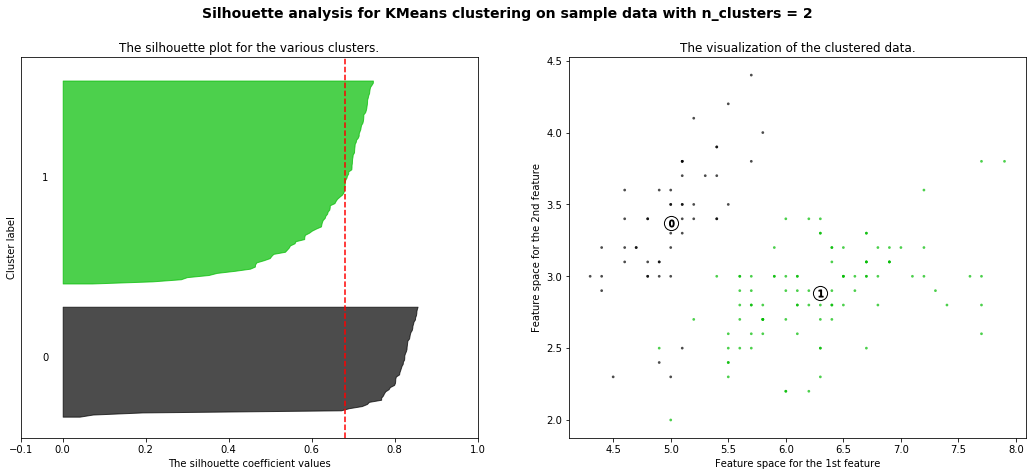

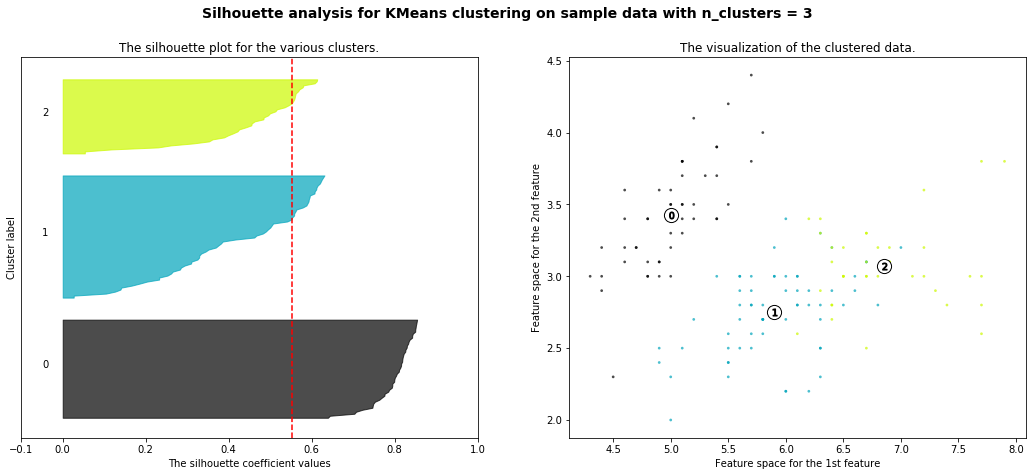

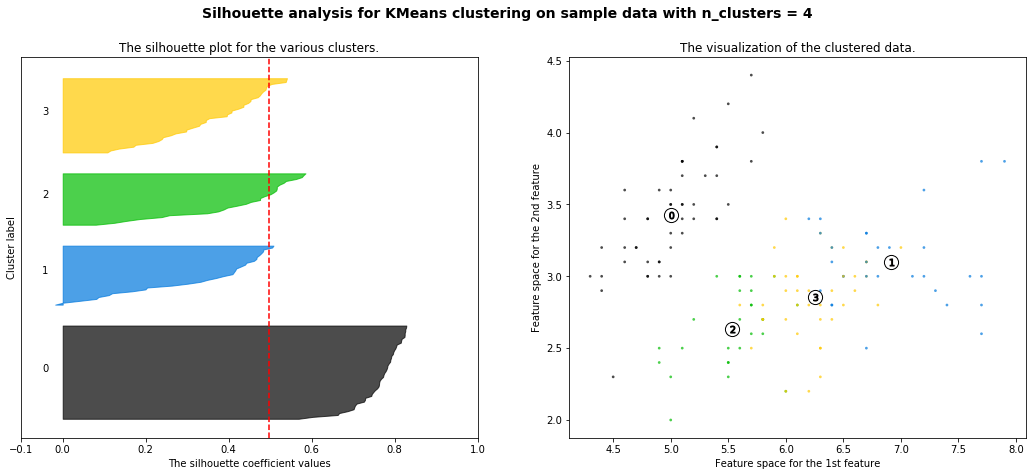

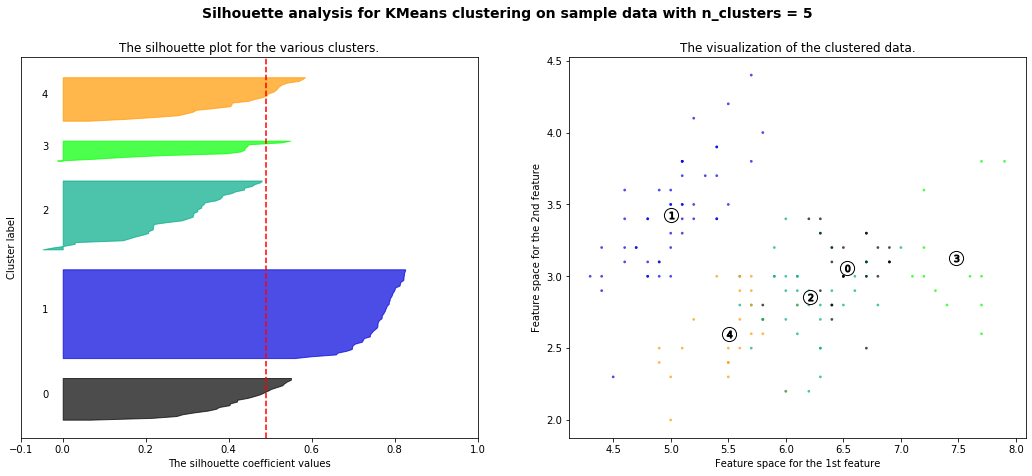

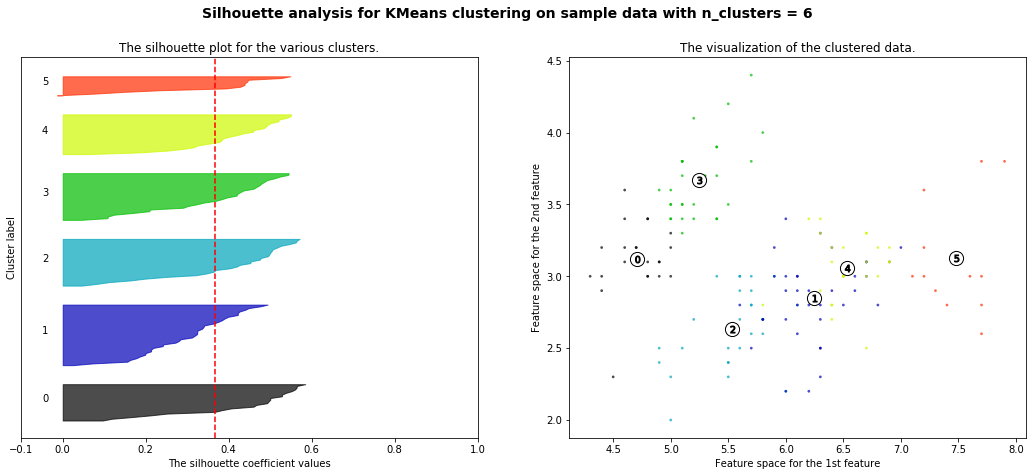

In [2]:
## Your code goes here
dataset = datasets.load_iris()
X = dataset.data
y = dataset.target

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

b. Compare your clustering results with the actual labels in the Iris dataset. Is there a difference? Explain what might be the cause of the difference.

In [3]:
## Your code goes here

# From the plots produced above, we can see that if we divide the data set into 6 clusters, we achieve the best results.
# The silhoutte coeff. values are all good and the variance of each cluster seems to be reasonable.
# The cause of the difference is possibly because the increased number of clusters decrease the variances between each cluster.

#### Question 3 (3 points)

a. Look at the hierarchical clustering documentation for [scipy](https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html). Perform hierachical clustering on the Iris dataset using single, complete, average and centroid linkage. Plot their associated dendrogram.

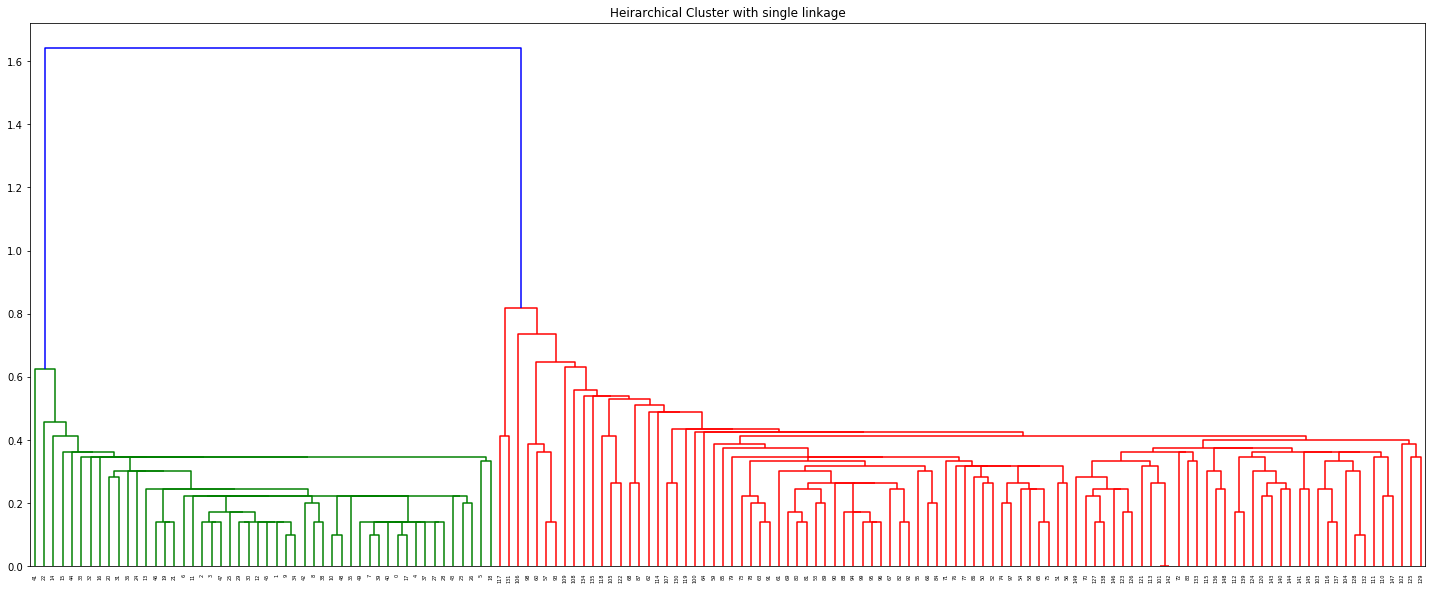

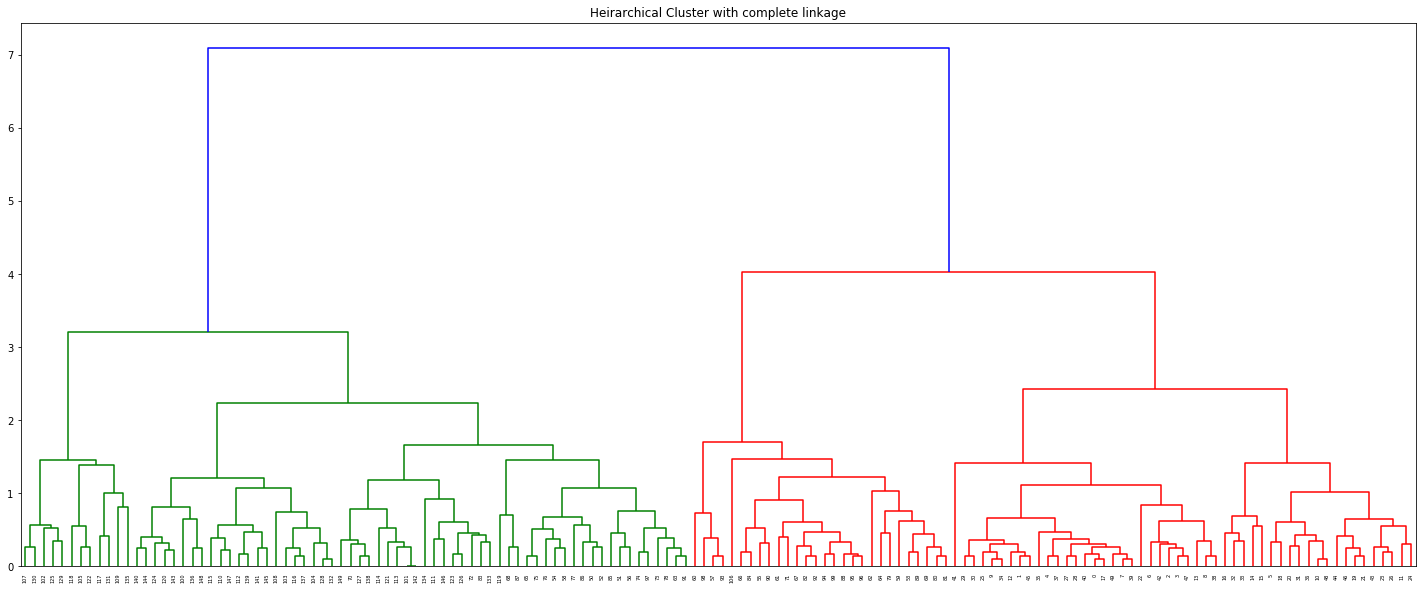

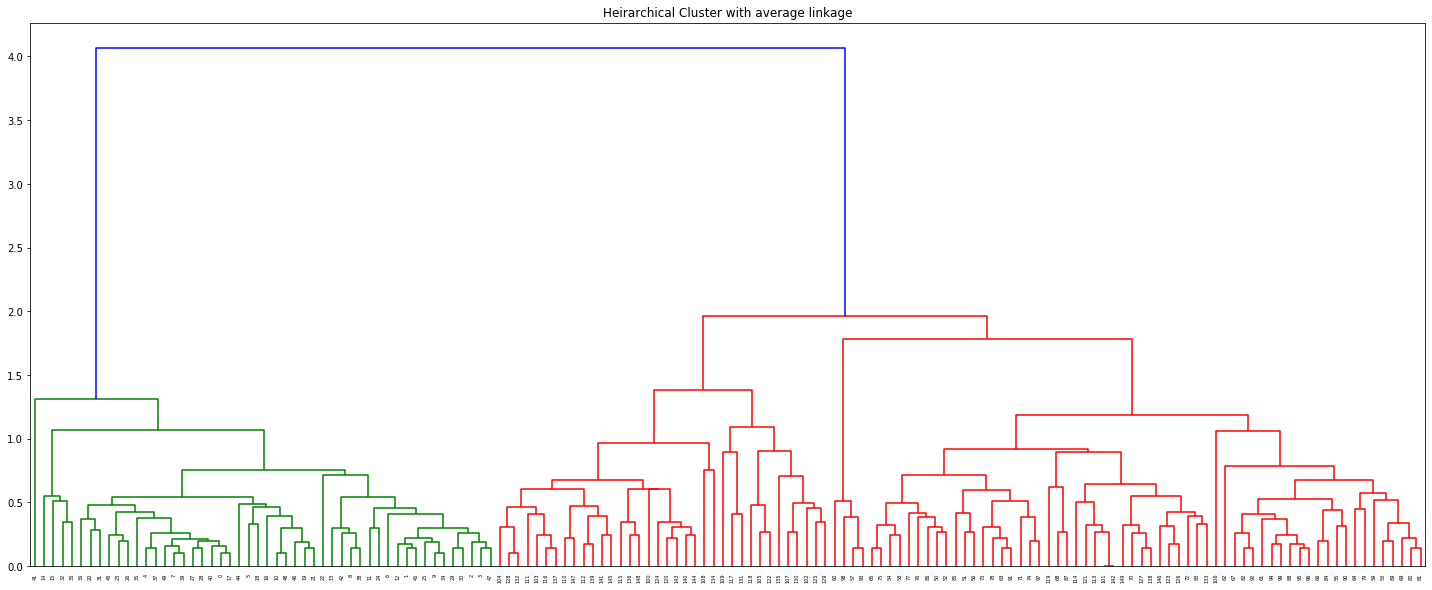

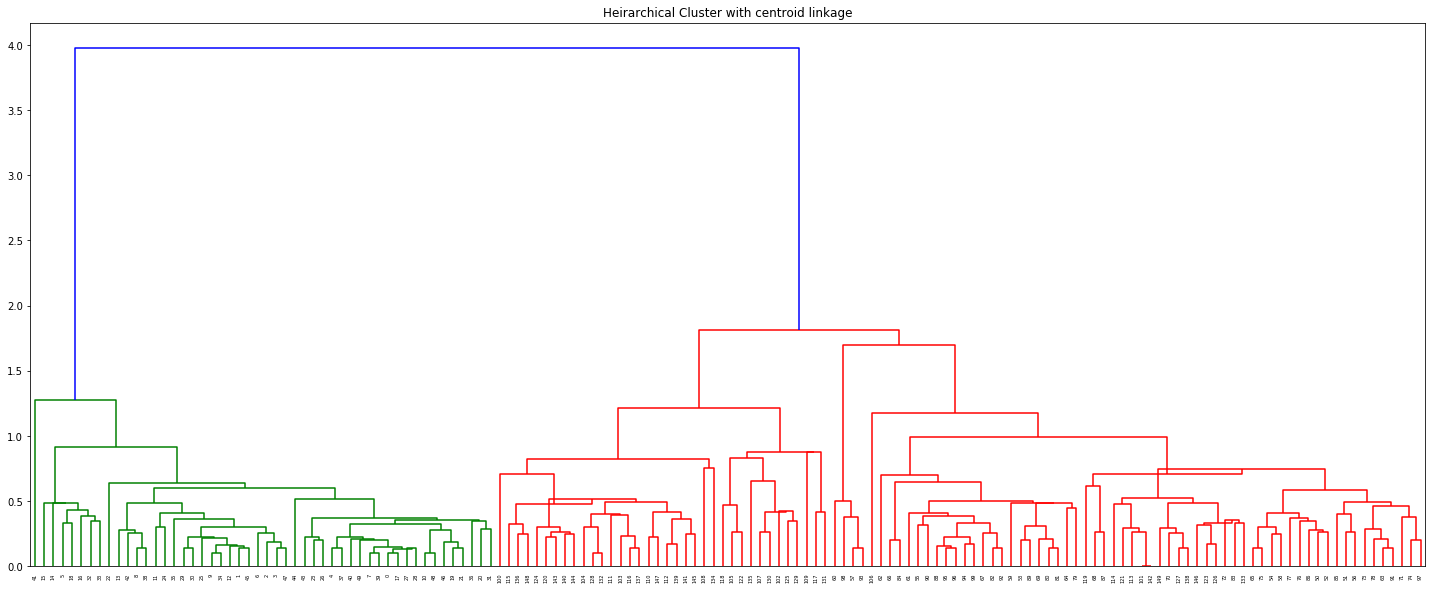

In [4]:
# Your code goes here
from scipy.cluster.hierarchy import dendrogram, linkage
link = ['single','complete','average','centroid']

for i in link:
    Z = linkage(X,i)
    fig = plt.figure(figsize = (25,10))
    dn = dendrogram(Z)
    plt.title('Heirarchical Cluster with ' + i +' linkage')
    plt.show()

b. Look at the dendrograms more closely and explain the difference between each linkage method.

In [5]:
# Your discussion goes here

# Complete, Average & Single linkage is the most computationally expensive method 
# because it is testing for the shortest/average/largest dissimilarity between clusters.
# You can see there are significantly more computations done between each layer of the algorithm. 

# Centroid linkage has an issue with inversion. The dissimilarity between a group & other groups' centroid is not consistent.

c. Choose your linkage method and the number of clusters you would like to keep. Create clustering labels for the Iris dataset and compare with the actual labels. Explain the difference.

In [22]:
# Your code goes here
# I CHOOSE COMPLETE! I would like to retain 4 clusters.

from sklearn.cluster import AgglomerativeClustering as ac
cluster = ac(n_clusters = 4, linkage = 'complete').fit(X)

In [25]:
# Your discussion goes here
print(cluster.labels_)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 1 2 1 2 2 1 2 1 2 1 1
 1 1 1 1 1 2 2 2 2 1 2 1 1 1 2 2 2 1 2 2 2 2 2 1 2 2 1 1 3 1 1 3 2 3 1 3 1
 1 1 1 1 1 1 3 3 1 1 1 3 1 1 3 1 1 1 3 3 3 1 1 1 3 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# The introduction of a 4th cluster seems to jumble up the original order of the labels.
# The newly assigned cluster labels are not as accurate as the original labels simply because these are all estimations
# whereas the original labels were assigned with domain knowledge.

# Data points with clear cut different features are easy to pick up but the algorithm might struggle more with data points
# with similar features (neighboring points on the border of each cluster).